# Importando Bibliotecas

In [113]:
import pandas            as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mpc
import seaborn           as sns

# Setando padrões de plotagem

In [114]:
sns.set_theme()
sns.set_palette('Set2')

cmap_aluravoz = mpc.LinearSegmentedColormap.from_list(
    'AluraVoz', 
    [
     (0.0, '#154580'),
     (0.5, '#edf7dd'),
     (1.0, '#82d712')
    ]
)

# Aquisição de dados

In [115]:
churn_df = pd.read_json('https://raw.githubusercontent.com/sthemonica/alura-voz/main/Dados/Telco-Customer-Churn.json')

churn_df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


# Informações  iniciais do Dataset

In [116]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [117]:
len(churn_df['customerID'].unique())

7267

# Entendendo as informações presentes no Dataset

* **`customerID`** - ID do cliente
* **`Churn`** - representa se a pessoa deixou a empresa ou não
* **`curtomer`** - objeto com características dos clientes
* **`phone`** - objeto com informações do telefone do cliente
* **`internet`** - objeto com informações da internet do cliente
* **`account`** - objeto com informações da conta do cliente

### Coluna `Churn`

In [118]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
        224
Name: Churn, dtype: int64

Fica evidente que temos 224 dados da coluna `Churn` que estão vazios. Ou seja, há dados em que a informação chave para a análise desse caso estão não-rotulados. 

In [119]:
no_labeled_churn = churn_df.query("Churn == ''")

no_labeled_churn.head()

,customerID,Churn,customer,phone,internet,account
30,0047-ZHDTW,,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
75,0120-YZLQA,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Two year', 'PaperlessBilling': '..."
96,0154-QYHJU,,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
98,0162-RZGMZ,,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
175,0274-VVQOQ,,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'One year', 'PaperlessBilling': '..."


In [120]:
no_labeled_churn_mask = ~(churn_df['Churn'] == '')

no_labeled_churn_mask

0       True
1       True
2       True
3       True
4       True
        ... 
7262    True
7263    True
7264    True
7265    True
7266    True
Name: Churn, Length: 7267, dtype: bool

## Informações presentes nas colunas que apresentam objetos

### Coluna `customer`
* gender
  - 1 - Masculino
  - 0 - Feminino
* SeniorCitizen 
  - 1 - Cliente é idoso (acima de 65 anos)
  - 0 - Cliente não é idoso
* Partner 
  - 1 - Possui parceiro(a)
  - 0 - Não possui parceiro(a)
* Dependents 
  - 1 - Tem dependentes
  - 0 - Não tem dependentes
* tenure
 - Número de meses que um cliente permaneceu na empresa

In [121]:
customer_df = pd.json_normalize(data=churn_df['customer'])

customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [122]:
customer_df['gender'] = customer_df['gender'].map({'Male': 1, 'Female': 0})
customer_df['Partner'] = customer_df['Partner'].map({'Yes': 1, 'No': 0})
customer_df['Dependents'] = customer_df['Dependents'].map({'Yes': 1, 'No': 0})

In [123]:
customer_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,0,0,1,1,9
1,1,0,0,0,9
2,1,0,0,0,4
3,1,1,1,0,13
4,0,1,1,0,3


In [124]:
gender_count = pd.DataFrame(customer_df['gender'].map({1: 'Male', 0: 'Female'}).value_counts())

gender_count.rename(columns={'gender': 'Count'}, inplace=True)
gender_count.index.name = 'Gender'

gender_count

,Count
Gender,
Male,3675
Female,3592


In [125]:
SeniorCitizen_count = pd.DataFrame(customer_df['SeniorCitizen'].value_counts())

SeniorCitizen_count.rename(columns={'SeniorCitizen': 'Count'}, index={0: 'No', 1: 'Yes'}, inplace=True)
SeniorCitizen_count.index.name = 'SeniorCitizen'

SeniorCitizen_count

,Count
SeniorCitizen,
No,6085
Yes,1182


In [126]:
Partner_count = pd.DataFrame(customer_df['Partner'].map({1: 'Sim', 0: 'Não'}).value_counts())

Partner_count.rename(columns={'Partner': 'Count'}, inplace=True)
Partner_count.index.name = 'Partner'

Partner_count

,Count
Partner,
Não,3749
Sim,3518


In [127]:
Dependents_count = pd.DataFrame(customer_df['Dependents'].map({1: 'Sim', 0: 'Não'}).value_counts())

Dependents_count.rename(columns={'Dependents': 'Count'}, inplace=True)
Dependents_count.index.name = 'Dependents'

Dependents_count

,Count
Dependents,
Não,5086
Sim,2181


In [128]:
tenure_nan_count = pd.DataFrame(customer_df['tenure'].isna().value_counts())

tenure_nan_count.rename(columns={'tenure': 'Count'}, inplace=True)
tenure_nan_count.index.name = 'tenure is NaN'

tenure_nan_count

,Count
tenure is NaN,
False,7267


---
### Coluna `phone`
* PhoneService 
  - 1 - Cliente tem serviço telefônico
  - 0 - Cliente não tem serviço telefônico
* MultipleLines 
  - 1 - Cliente tem várias linhas
  - 0 - Cliente não tem várias linhas
  - 2 - Cliente não tem serviço telefônico

In [129]:
phone_df = pd.json_normalize(data=churn_df['phone'])

phone_df.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [130]:
phone_df['PhoneService'] = phone_df['PhoneService'].map({'Yes': 1, 'No': 0})
phone_df['MultipleLines'] = phone_df['MultipleLines'].map({'No phone service': 2, 'Yes': 1, 'No': 0})

In [131]:
phone_df.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


In [132]:
PhoneService_count = pd.DataFrame(phone_df['PhoneService'].map({1: 'Yes', 0: 'No'}).value_counts())

PhoneService_count.rename(columns={'PhoneService': 'Count'}, inplace=True)
PhoneService_count.index.name = 'PhoneService'

PhoneService_count

,Count
PhoneService,
Yes,6560
No,707


In [133]:
MultipleLines_count = pd.DataFrame(phone_df['MultipleLines'].map({2: 'No phone service', 1: 'Yes', 0: 'No'}).value_counts())

MultipleLines_count.rename(columns={'MultipleLines': 'Count'}, inplace=True)
MultipleLines_count.index.name = 'MultipleLines'

MultipleLines_count

,Count
MultipleLines,
No,3495
Yes,3065
No phone service,707


---
### Coluna `internet`
* InternetService	
  - Tipos de conexão
    - 0 - DSL (Digital Subscriber Line)
    - 1 - Fibra ótica
  - 2 - Cliente não tem serviço de internet
* OnlineSecurity
 - 1 - Cliente tem segurança online
 - 0 - Cliente não tem segurança online
 - 2 - Cliente não tem serviço de internet
* OnlineBackup
 - 1 - Cliente tem backup online
 - 0 - Cliente não tem backup online
 - 2 - Cliente não tem serviço de internet
* DeviceProtection
 - 1 - Cliente tem proteção de dispositivo
 - 0 - Cliente não tem proteção de dispositivo
 - 2 - Cliente não tem serviço de internet
* TechSupport
 - 1 - Cliente tem suporte técnico
 - 0 - Cliente não tem suporte técnico
 - 2 - Cliente não tem serviço de internet
* StreamingTV
 - 1 - Cliente tem TV a cabo
 - 0 - Cliente não tem TV a cabo
 - 2 - Cliente não tem serviço de internet
* StreamingMovies
 - 1 - Cliente tem streaming de filmes
 - 0 - Cliente não tem streaming de filmes
 - 2 - Cliente não tem serviço de internet

In [134]:
internet_df = pd.json_normalize(data=churn_df['internet'])

internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [135]:
internet_df['InternetService'] = internet_df['InternetService'].map({'No': 2, 'Fiber optic': 1, 'DSL': 0})
internet_df['OnlineSecurity'] = internet_df['OnlineSecurity'].map({'No internet service': 2, 'Yes': 1, 'No': 0})
internet_df['OnlineBackup'] = internet_df['OnlineBackup'].map({'No internet service': 2, 'Yes': 1, 'No': 0})
internet_df['DeviceProtection'] = internet_df['DeviceProtection'].map({'No internet service': 2, 'Yes': 1, 'No': 0})
internet_df['TechSupport'] = internet_df['TechSupport'].map({'No internet service': 2, 'Yes': 1, 'No': 0})
internet_df['StreamingTV'] = internet_df['StreamingTV'].map({'No internet service': 2, 'Yes': 1, 'No': 0})
internet_df['StreamingMovies'] = internet_df['StreamingMovies'].map({'No internet service': 2, 'Yes': 1, 'No': 0})

In [136]:
internet_df.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,1,1,0
1,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0
3,1,0,1,1,0,1,1
4,1,0,0,0,1,1,0


In [137]:
InternetService_count = pd.DataFrame(internet_df['InternetService'].map({2: 'No', 1: 'Fiber optic', 0: 'DSL'}).value_counts())

InternetService_count.rename(columns={'InternetService': 'Count'}, inplace=True)
InternetService_count.index.name = 'InternetService'

InternetService_count

,Count
InternetService,
Fiber optic,3198
DSL,2488
No,1581


In [138]:
OnlineSecurity_count = pd.DataFrame(internet_df['OnlineSecurity'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

OnlineSecurity_count.rename(columns={'OnlineSecurity': 'Count'}, inplace=True)
OnlineSecurity_count.index.name = 'OnlineSecurity'

OnlineSecurity_count

,Count
OnlineSecurity,
No,3608
Yes,2078
No internet service,1581


In [139]:
OnlineBackup_count = pd.DataFrame(internet_df['OnlineBackup'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

OnlineBackup_count.rename(columns={'OnlineBackup': 'Count'}, inplace=True)
OnlineBackup_count.index.name = 'OnlineBackup'

OnlineBackup_count

,Count
OnlineBackup,
No,3182
Yes,2504
No internet service,1581


In [140]:
DeviceProtection_count = pd.DataFrame(internet_df['DeviceProtection'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

DeviceProtection_count.rename(columns={'DeviceProtection': 'Count'}, inplace=True)
DeviceProtection_count.index.name = 'DeviceProtection'

DeviceProtection_count

,Count
DeviceProtection,
No,3195
Yes,2491
No internet service,1581


In [141]:
TechSupport_count = pd.DataFrame(internet_df['TechSupport'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

TechSupport_count.rename(columns={'TechSupport': 'Count'}, inplace=True)
TechSupport_count.index.name = 'TechSupport'

TechSupport_count

,Count
TechSupport,
No,3582
Yes,2104
No internet service,1581


In [142]:
StreamingTV_count = pd.DataFrame(internet_df['StreamingTV'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

StreamingTV_count.rename(columns={'StreamingTV': 'Count'}, inplace=True)
StreamingTV_count.index.name = 'StreamingTV'

StreamingTV_count

,Count
StreamingTV,
No,2896
Yes,2790
No internet service,1581


In [143]:
StreamingMovies_count = pd.DataFrame(internet_df['StreamingMovies'].map({2: 'No internet service', 1: 'Yes', 0: 'No'}).value_counts())

StreamingMovies_count.rename(columns={'StreamingMovies': 'Count'}, inplace=True)
StreamingMovies_count.index.name = 'StreamingMovies'

StreamingMovies_count

,Count
StreamingMovies,
No,2870
Yes,2816
No internet service,1581


---
### Coluna `account`
* Contract
  - O prazo do contrato do cliente
    - 0 - Mês-a-mês
    - 1 - Um ano
    - 2 - 2 anos
* PaperlessBilling
  - 1 - Cliente recebe faturamento sem papel
  - 0 - Cliente recebe faturamento com papel
* PaymentMethod
  - O método de pagamento do cliente
    - 0 - Cheque eletrônico
    - 1 - Cheque enviado
    - 2 - Transferência bancária (automática)
    - 3 - Cartão de crédito (automático)
* Charges_Monthly
  - O valor cobrado do cliente mensalmente
* Charges_Total
  - O valor total cobrado do cliente

In [144]:
account_df = pd.json_normalize(data=churn_df['account'], sep='_')

account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [145]:
account_df['Contract'] = account_df['Contract'].map({'Two year': 2, 'One year': 1, 'Month-to-month': 0})
account_df['PaperlessBilling'] = account_df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
account_df['PaymentMethod'] = account_df['PaymentMethod'].map({'Credit card (automatic)': 3, 'Bank transfer (automatic)': 2, 'Mailed check': 1, 'Electronic check': 0})

In [146]:
account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total
0,1,1,1,65.6,593.3
1,0,0,1,59.9,542.4
2,0,1,0,73.9,280.85
3,0,1,0,98.0,1237.85
4,0,1,1,83.9,267.4


In [147]:
account_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   int64  
 1   PaperlessBilling  7267 non-null   int64  
 2   PaymentMethod     7267 non-null   int64  
 3   Charges_Monthly   7267 non-null   float64
 4   Charges_Total     7267 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 284.0+ KB


Se pegarmos a primeira célula, ao ver que o contrato é anual e ao multiplicar $65,60 \cdot 12 \neq 593,30$. Isso quer dizer que muito provavelmente há algum tipo de desconto entre os contratos mais longos.

In [148]:
(account_df['Charges_Total'] == ' ').value_counts()

False    7256
True       11
Name: Charges_Total, dtype: int64

Logo, é possível perceber que, além de estar como tipo objeto, nossa coluna `Charges_Total` possui valores vazios.

In [149]:
Contract_count = pd.DataFrame(account_df['Contract'].map({2: 'Two year', 1: 'One year', 0: 'Month-to-month'}).value_counts())

Contract_count.rename(columns={'Contract': 'Count'}, inplace=True)
Contract_count.index.name = 'Contract'

Contract_count

,Count
Contract,
Month-to-month,4005
Two year,1743
One year,1519


In [150]:
PaperlessBilling_count = pd.DataFrame(account_df['PaperlessBilling'].map({1: 'Yes', 0: 'No'}).value_counts())

PaperlessBilling_count.rename(columns={'PaperlessBilling': 'Count'}, inplace=True)
PaperlessBilling_count.index.name = 'PaperlessBilling'

PaperlessBilling_count

,Count
PaperlessBilling,
Yes,4311
No,2956


In [151]:
PaymentMethod_count = pd.DataFrame(account_df['PaymentMethod'].map({3: 'Credit card (automatic)', 2: 'Bank transfer (automatic)', 1: 'Mailed check', 0: 'Electronic check'}).value_counts())

PaymentMethod_count.rename(columns={'PaymentMethod': 'Count'}, inplace=True)
PaymentMethod_count.index.name = 'PaymentMethod'

PaymentMethod_count

,Count
PaymentMethod,
Electronic check,2445
Mailed check,1665
Bank transfer (automatic),1589
Credit card (automatic),1568


In [152]:
Charges_Monthly_nan_count = pd.DataFrame(account_df['Charges_Monthly'].isna().value_counts())

Charges_Monthly_nan_count.rename(columns={'Charges_Monthly': 'Count'}, inplace=True)
Charges_Monthly_nan_count.index.name = 'Charges_Monthly'

Charges_Monthly_nan_count

,Count
Charges_Monthly,
False,7267


In [153]:
Charges_Total_nan_count = pd.DataFrame(account_df['Charges_Total'].isna().value_counts())

Charges_Total_nan_count.rename(columns={'Charges_Total': 'Count'}, inplace=True)
Charges_Total_nan_count.index.name = 'Charges_Total'

Charges_Total_nan_count

,Count
Charges_Total,
False,7267


In [154]:
account_df['Charges_Daily'] = (account_df['Charges_Monthly'] / 30).round(2)

Charges_Daily_nan_count = pd.DataFrame(account_df['Charges_Daily'].isna().value_counts())

Charges_Daily_nan_count.rename(columns={'Charges_Daily': 'Count'}, inplace=True)
Charges_Daily_nan_count.index.name = 'Charges_Daily'

Charges_Daily_nan_count

,Count
Charges_Daily,
False,7267


In [155]:
account_df = account_df.reindex(columns=['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges_Daily', 
                            'Charges_Monthly', 'Charges_Total'])

account_df.head()

,Contract,PaperlessBilling,PaymentMethod,Charges_Daily,Charges_Monthly,Charges_Total
0,1,1,1,2.19,65.6,593.3
1,0,0,1,2.00,59.9,542.4
2,0,1,0,2.46,73.9,280.85
3,0,1,0,3.27,98.0,1237.85
4,0,1,1,2.80,83.9,267.4


# Juntando todas as informações em um só dataset


In [156]:
churn_df = pd.concat([churn_df.drop(columns=['customerID', 'customer', 'phone', 'internet', 'account']), 
                      customer_df, phone_df, internet_df, account_df], axis='columns')

churn_df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Daily,Charges_Monthly,Charges_Total
0,No,0,0,1,1,9,1,0,0,0,...,0,1,1,0,1,1,1,2.19,65.6,593.3
1,No,1,0,0,0,9,1,1,0,0,...,0,0,0,1,0,0,1,2.00,59.9,542.4
2,Yes,1,0,0,0,4,1,0,1,0,...,1,0,0,0,0,1,0,2.46,73.9,280.85
3,Yes,1,1,1,0,13,1,0,1,0,...,1,0,1,1,0,1,0,3.27,98.0,1237.85
4,Yes,0,1,1,0,3,1,0,1,0,...,0,1,1,0,0,1,1,2.80,83.9,267.4


In [157]:
churn_df = churn_df[no_labeled_churn_mask]

churn_df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Daily,Charges_Monthly,Charges_Total
0,No,0,0,1,1,9,1,0,0,0,...,0,1,1,0,1,1,1,2.19,65.6,593.3
1,No,1,0,0,0,9,1,1,0,0,...,0,0,0,1,0,0,1,2.00,59.9,542.4
2,Yes,1,0,0,0,4,1,0,1,0,...,1,0,0,0,0,1,0,2.46,73.9,280.85
3,Yes,1,1,1,0,13,1,0,1,0,...,1,0,1,1,0,1,0,3.27,98.0,1237.85
4,Yes,0,1,1,0,3,1,0,1,0,...,0,1,1,0,0,1,1,2.80,83.9,267.4


In [158]:
no_value_Charges_Total_mask = ~(churn_df['Charges_Total'] == ' ')

no_value_Charges_Total_mask

0       True
1       True
2       True
3       True
4       True
        ... 
7262    True
7263    True
7264    True
7265    True
7266    True
Name: Charges_Total, Length: 7043, dtype: bool

In [159]:
churn_df = churn_df[no_value_Charges_Total_mask]

churn_df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Daily,Charges_Monthly,Charges_Total
0,No,0,0,1,1,9,1,0,0,0,...,0,1,1,0,1,1,1,2.19,65.6,593.3
1,No,1,0,0,0,9,1,1,0,0,...,0,0,0,1,0,0,1,2.00,59.9,542.4
2,Yes,1,0,0,0,4,1,0,1,0,...,1,0,0,0,0,1,0,2.46,73.9,280.85
3,Yes,1,1,1,0,13,1,0,1,0,...,1,0,1,1,0,1,0,3.27,98.0,1237.85
4,Yes,0,1,1,0,3,1,0,1,0,...,0,1,1,0,0,1,1,2.80,83.9,267.4


Trocando os valores de `Churn`
- 1 - Yes
- 0 - No

In [160]:
churn_df['Churn'] = churn_df['Churn'].map({'Yes': 1, 'No': 0})

In [161]:
churn_df['Charges_Total'] = churn_df['Charges_Total'].apply(float)

In [162]:
churn_df.reset_index(inplace=True)
churn_df.drop(columns=['index'], inplace=True)

In [163]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7032 non-null   int64  
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   int64  
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   int64  
 16  PaperlessBilling  7032 non-null   int64  


Finalizando assim, o tratamento inicial da nossa base de dados

# Análise da variável target: `Churn`

Inicialmente vamos analisar como `Churn` está distribuida na base de dados

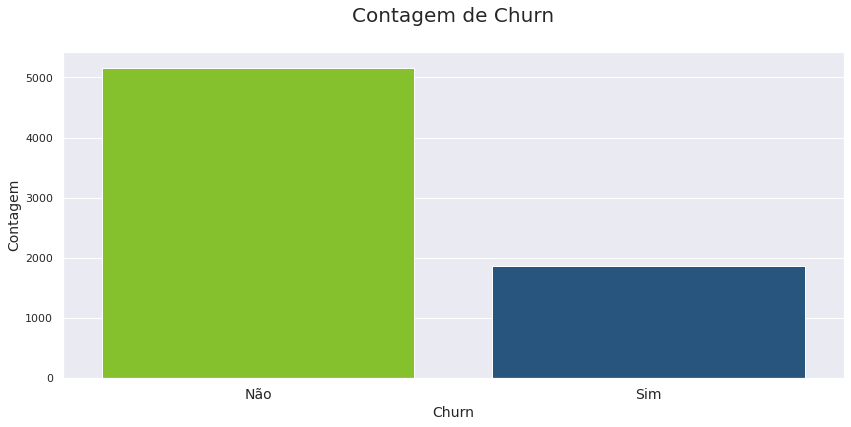

In [164]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de Churn', fontsize=20, pad=30)
plt.xlabel('Churn', fontsize=14)
plt.xticks([0, 1], ['Não', 'Sim'], fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.show()

Em termos de porcentagem, temos:

In [165]:
(churn_df['Churn'].map({1: 'Yes', 0: 'No'}).value_counts(normalize=True) * 100).round(2)

No     73.42
Yes    26.58
Name: Churn, dtype: float64

In [166]:
churn_df['Churn'].map({1: 'Yes', 0: 'No'}).value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Ao que indica a análise dos dados, a empresa AluraVoz perdeu 26,58% dos clientes em nossa base de dados. Em números absolutos, isso quer dizer que foram 1869 clientes.

## Relação das outras variáveis com `Churn`

### `gender`

Vamos analisar como a nossa variável `gender` em relação à variável alvo `Churn`

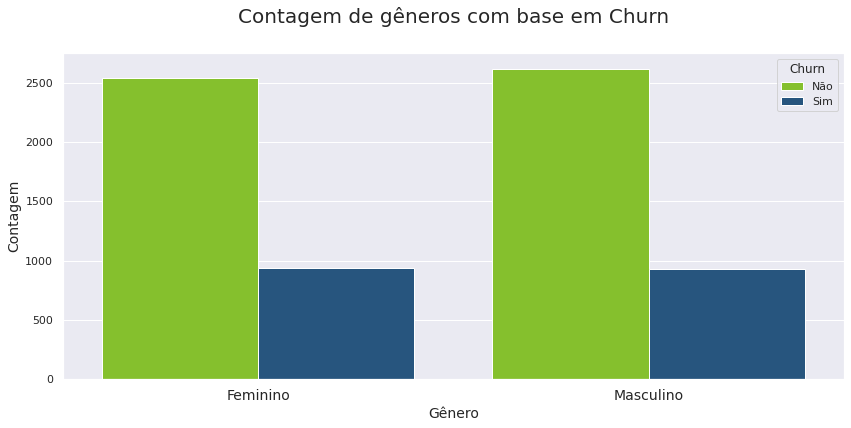

In [167]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['gender'].map({1: 'Masculino', 0: 'Feminino'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de gêneros com base em Churn', fontsize=20, pad=30)
plt.xlabel('Gênero', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [168]:
(churn_df.query("gender == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    73.8
Sim    26.2
Name: Churn, dtype: float64

In [169]:
(churn_df.query("gender == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    73.04
Sim    26.96
Name: Churn, dtype: float64

Dado os resultados, vistos no gráfico e nas análises percentuais, é possível perceber que temos uma base de dados balanceada em `gender`

### `SeniorCitizen`

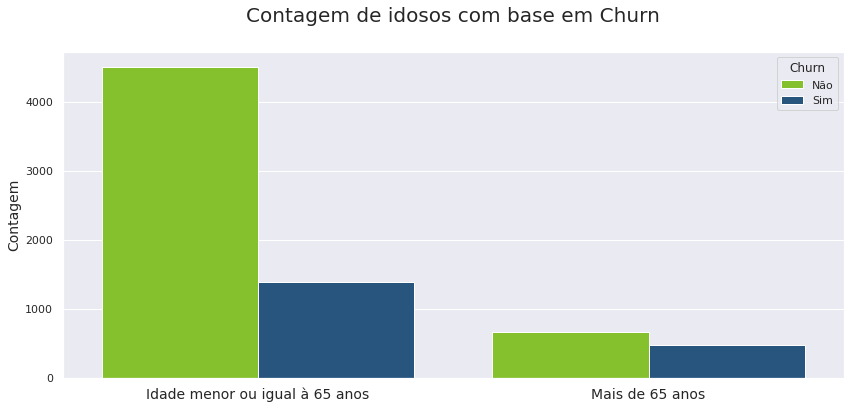

In [170]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['SeniorCitizen'].map({0: 'Não', 1: 'Sim'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de idosos com base em Churn', fontsize=20, pad=30)
plt.xlabel('')
plt.xticks([0, 1], ['Idade menor ou igual à 65 anos', 'Mais de 65 anos'], fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [171]:
(churn_df.query("SeniorCitizen == 0")['Churn'].value_counts(normalize=True) * 100).round(2)

0    76.35
1    23.65
Name: Churn, dtype: float64

In [172]:
(churn_df.query("SeniorCitizen == 1")['Churn'].value_counts(normalize=True) * 100).round(2)

0    58.32
1    41.68
Name: Churn, dtype: float64

In [173]:
churn_df.query("SeniorCitizen == 0")['Churn'].value_counts()

0    4497
1    1393
Name: Churn, dtype: int64

In [174]:
churn_df.query("SeniorCitizen == 1")['Churn'].value_counts()

0    666
1    476
Name: Churn, dtype: int64

Nossa base de dados mostra que a evasão é de 23,65% das pessoas com idade menor ou igual à 65 anos e de 41,68% das pessoas com idade maior que 65 anos. 

Em números absolutos seria uma evasão de 1393 clientes com idade menor ou igual à 65 anos e 476 clientes com idade maior que 65 anos.

### `Partner`

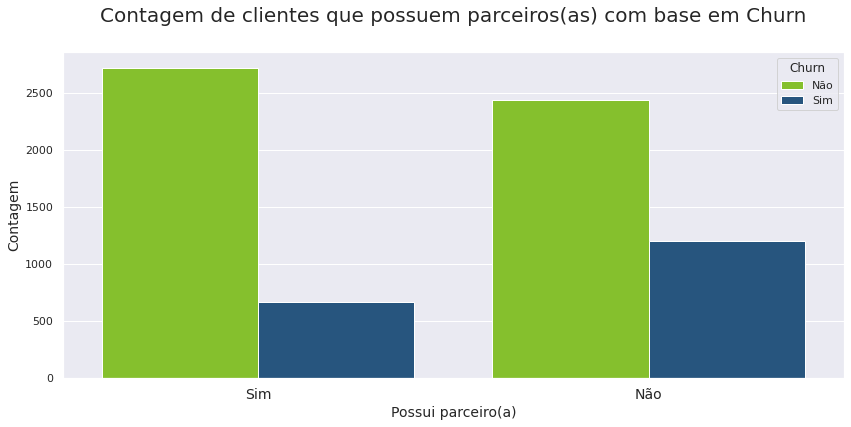

In [175]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['Partner'].map({1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que possuem parceiros(as) com base em Churn', fontsize=20, pad=30)
plt.xlabel('Possui parceiro(a)', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [176]:
(churn_df.query("Partner == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    67.02
Sim    32.98
Name: Churn, dtype: float64

In [177]:
(churn_df.query("Partner == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    80.28
Sim    19.72
Name: Churn, dtype: float64

32,98% das pessoas que não possuem parceiros(as) vieram a deixar de ser clientes, enquanto 19,72% das pessoas que possuem parceiros(as) vieram a deixar de ser clientes.

### `Dependents`

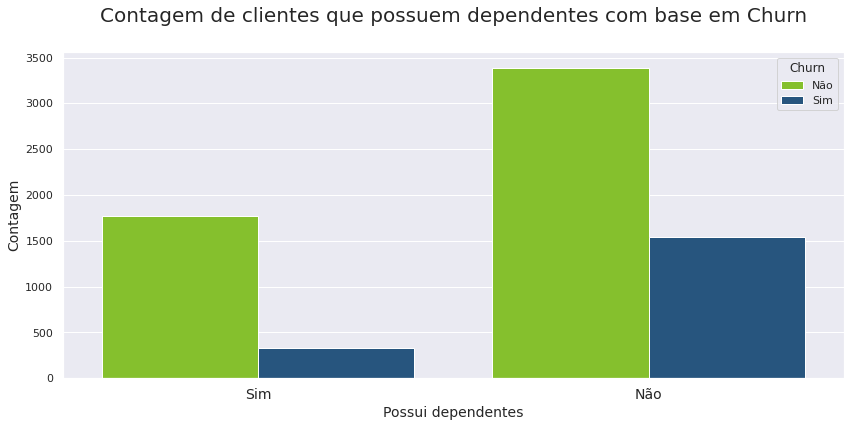

In [178]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['Dependents'].map({1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que possuem dependentes com base em Churn', fontsize=20, pad=30)
plt.xlabel('Possui dependentes', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [179]:
(churn_df.query("Dependents == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    68.72
Sim    31.28
Name: Churn, dtype: float64

In [180]:
(churn_df.query("Dependents == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    84.47
Sim    15.53
Name: Churn, dtype: float64

31,28% das pessoas que não possuem dependentes deixaram de ser clientes, enquanto apenas 15,53% das pessoas que possuem dependentes deixaram de ser clientes.

### `tenure`

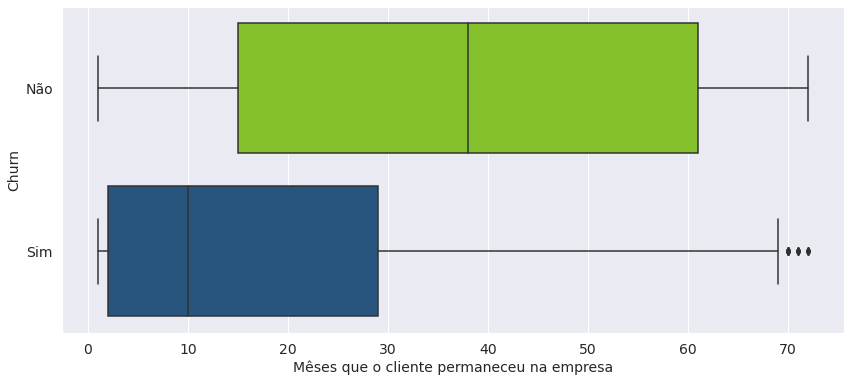

In [181]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=churn_df['tenure'], y=churn_df['Churn'].map({1: 'Sim', 0: 'Não'}), palette={'Não': '#8AD914', 'Sim': '#18568C'})

plt.xlabel('Mêses que o cliente permaneceu na empresa', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Como é possivel ver pelo gráfico, clientes que ficam mais meses na empresa tem uma tendência menor a vir a deixar de ser cliente.

### `PhoneService`

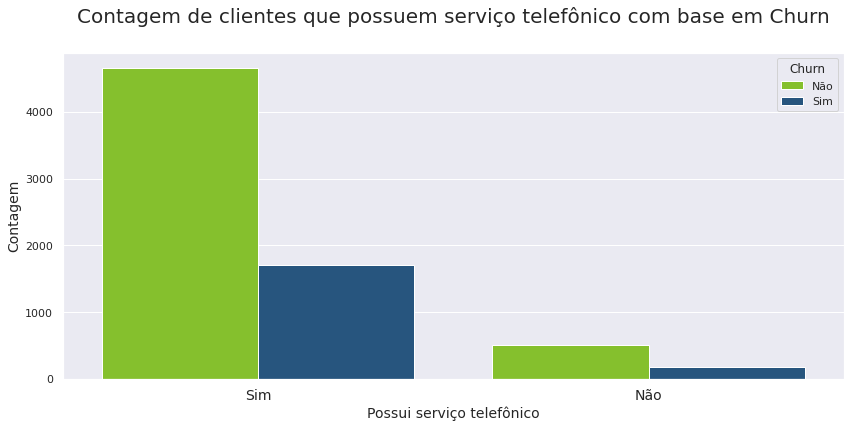

In [182]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['PhoneService'].map({1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que possuem serviço telefônico com base em Churn', fontsize=20, pad=30)
plt.xlabel('Possui serviço telefônico', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [183]:
(churn_df.query("PhoneService == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    75.0
Sim    25.0
Name: Churn, dtype: float64

In [184]:
(churn_df.query("PhoneService == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    73.25
Sim    26.75
Name: Churn, dtype: float64

A porcentagem de evasão de clientes parece não depender de o cliente possuir ou não serviço telefônico

### `MultipleLines`

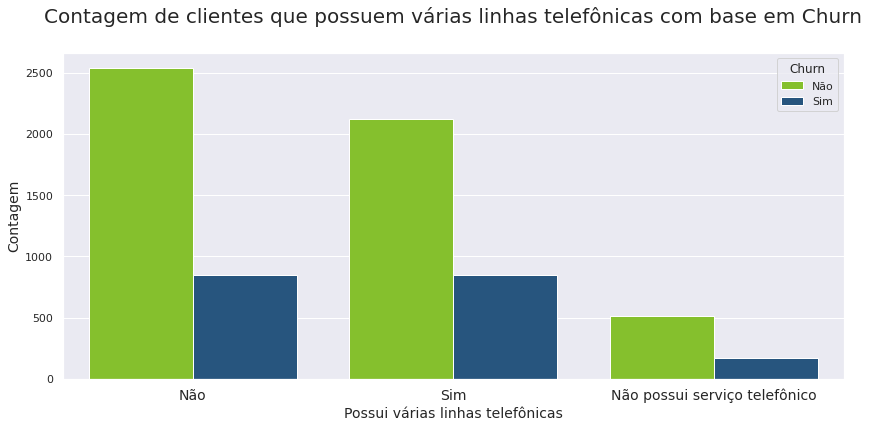

In [185]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['MultipleLines'].map({2: 'Não possui serviço telefônico', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que possuem várias linhas telefônicas com base em Churn', fontsize=20, pad=30)
plt.xlabel('Possui várias linhas telefônicas', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### `InternetService`

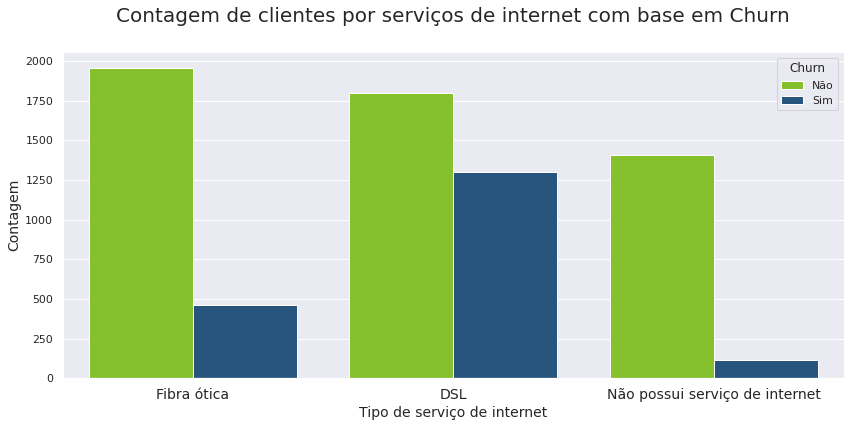

In [186]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['InternetService'].map({2: 'Não possui serviço de internet', 1: 'DSL', 0: 'Fibra ótica'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes por serviços de internet com base em Churn', fontsize=20, pad=30)
plt.xlabel('Tipo de serviço de internet', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [187]:
(churn_df.query("InternetService == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    58.11
Sim    41.89
Name: Churn, dtype: float64

Como é possível perceber por essa análise, o tipo de serviço DSL apresenta uma porcentagem grande de clientes que deixaram a AluraVoz

### `OnlineSecurity`

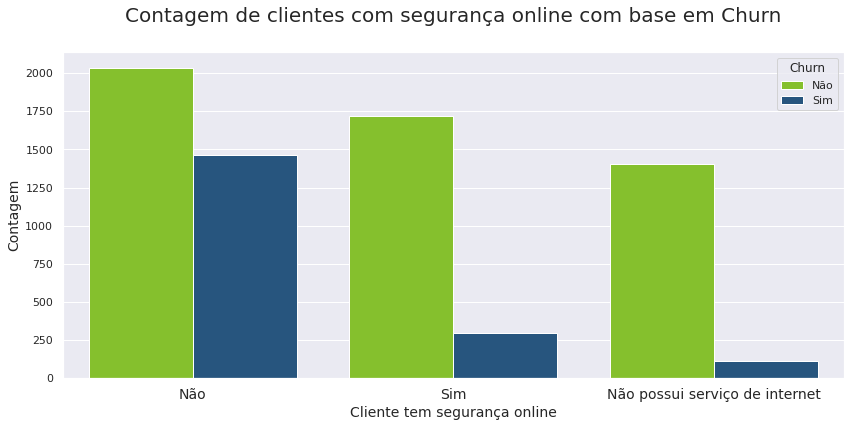

In [188]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['OnlineSecurity'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes com segurança online com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente tem segurança online', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [189]:
(churn_df.query("OnlineSecurity == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    58.22
Sim    41.78
Name: Churn, dtype: float64

É possível ver que os clientes que não possuem segurança online, a taxa de evasão é maior

### `OnlineBackup`

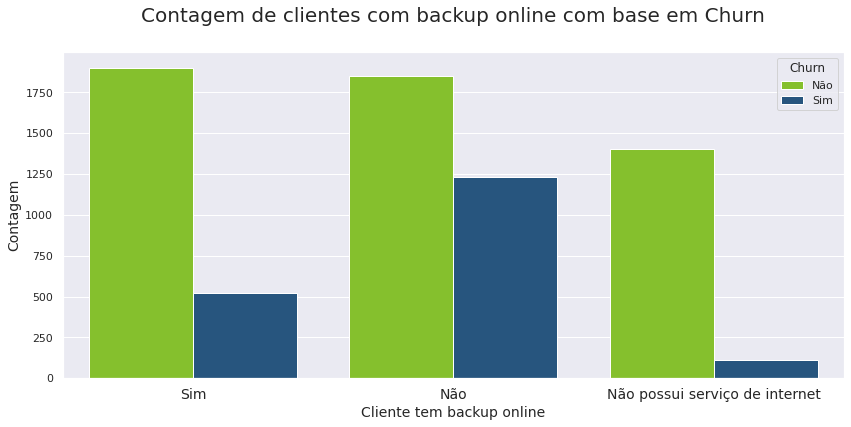

In [190]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['OnlineBackup'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes com backup online com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente tem backup online', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [191]:
(churn_df.query("OnlineBackup == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    60.06
Sim    39.94
Name: Churn, dtype: float64

### `DeviceProtection`

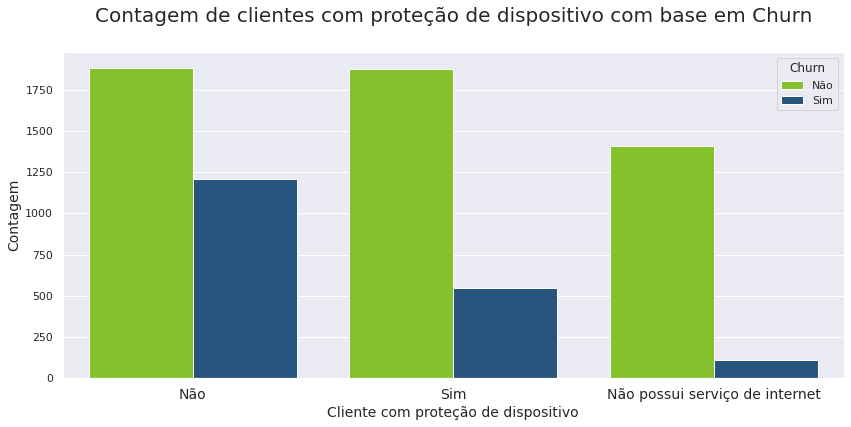

In [192]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['DeviceProtection'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes com proteção de dispositivo com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente com proteção de dispositivo', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [193]:
(churn_df.query("DeviceProtection == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    60.86
Sim    39.14
Name: Churn, dtype: float64

### `TechSupport`

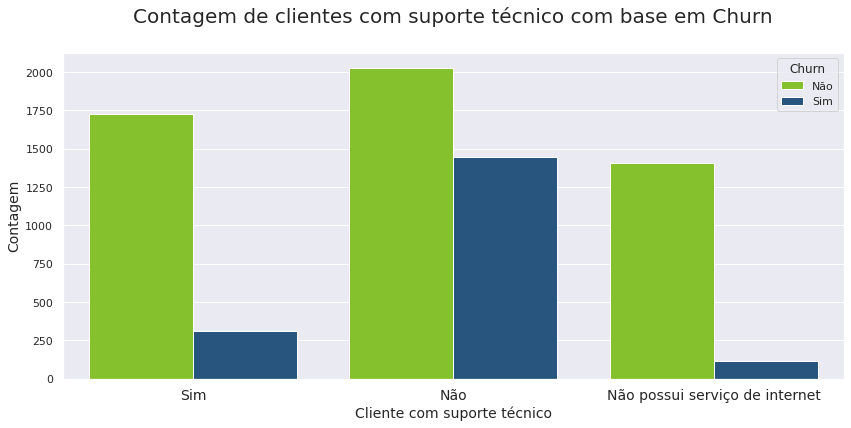

In [194]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['TechSupport'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes com suporte técnico com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente com suporte técnico', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [195]:
churn_df.query("TechSupport == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts().round(2)

Não    2026
Sim    1446
Name: Churn, dtype: int64

In [196]:
churn_df.query("TechSupport == 2")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts().round(2)

Não    1407
Sim     113
Name: Churn, dtype: int64

O número de clientes que não possuem suporte técnico e deixaram a empresa chega a ser maior que o número de clientes que não possuem serviço de internet e não deixaram a empresa

### `StreamingTV`

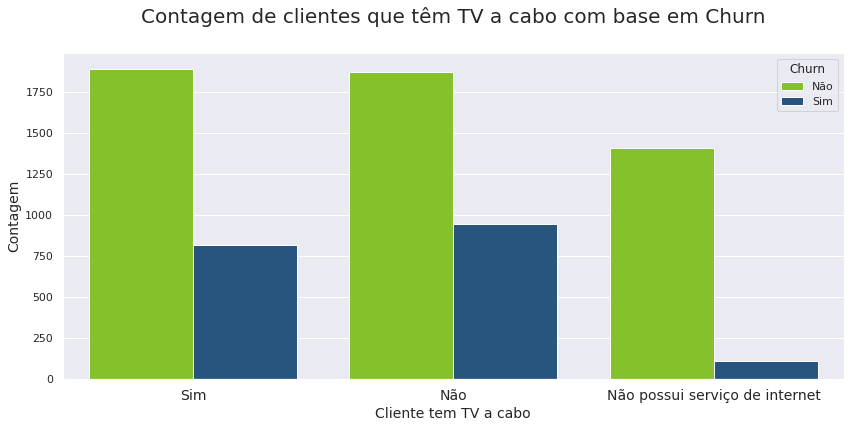

In [197]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['StreamingTV'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que têm TV a cabo com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente tem TV a cabo', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### `StreamingMovies`

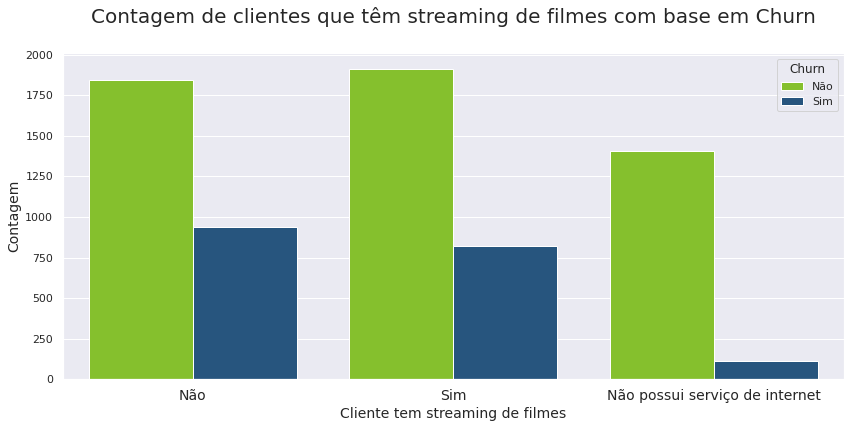

In [198]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['StreamingMovies'].map({2: 'Não possui serviço de internet', 1: 'Sim', 0: 'Não'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que têm streaming de filmes com base em Churn', fontsize=20, pad=30)
plt.xlabel('Cliente tem streaming de filmes', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### `Contract`

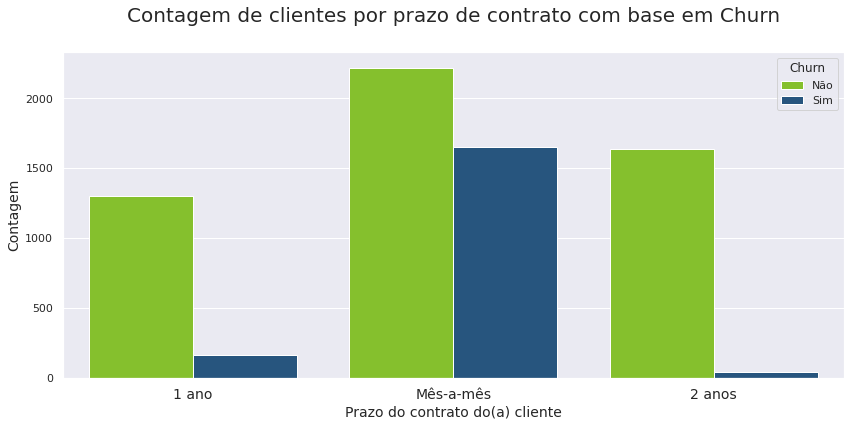

In [199]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['Contract'].map({2: '2 anos', 1: '1 ano', 0: 'Mês-a-mês'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes por prazo de contrato com base em Churn', fontsize=20, pad=30)
plt.xlabel('Prazo do contrato do(a) cliente', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [200]:
(churn_df.query("Contract == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    57.29
Sim    42.71
Name: Churn, dtype: float64

In [201]:
churn_df.query("Contract == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts().round(2)

Não    2220
Sim    1655
Name: Churn, dtype: int64

In [202]:
churn_df.query("Contract == 1")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts().round(2)

Não    1306
Sim     166
Name: Churn, dtype: int64

In [203]:
churn_df.query("Contract == 2")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts().round(2)

Não    1637
Sim      48
Name: Churn, dtype: int64

42,71% dos clientes que possuíam contrato mês-a-mês saíram da empresa. O número de clientes que saíram da empresa com contrato mês-a-mês chega a ser maior que o número de clientes com contratos de 1 ou 2 anos que não deixaram a empresa.

### `PaperlessBilling`

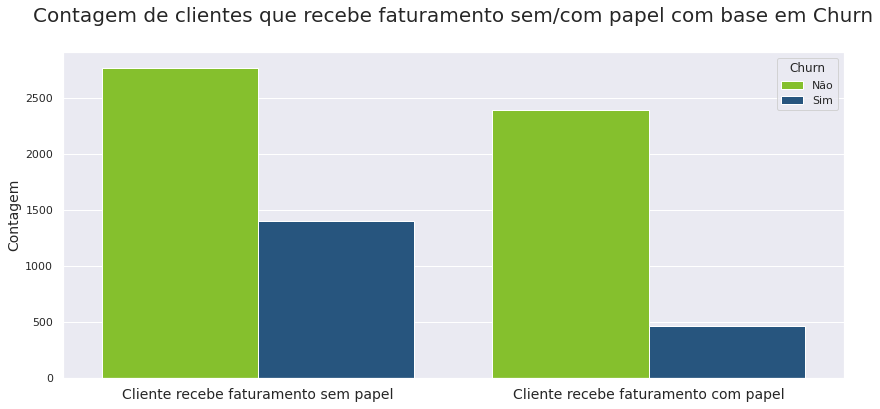

In [204]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['PaperlessBilling'].map({1: 'Cliente recebe faturamento sem papel', 0: 'Cliente recebe faturamento com papel'}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes que recebe faturamento sem/com papel com base em Churn', fontsize=20, pad=30)
plt.xlabel('', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

### `PaymentMethod`

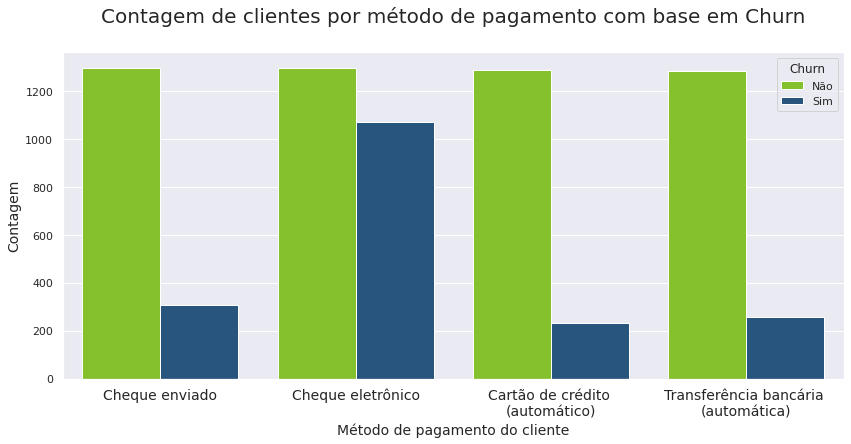

In [205]:
plt.figure(figsize=(14, 6))
sns.countplot(x=churn_df['PaymentMethod'].map({
    3: 'Cartão de crédito \n(automático)', 
    2: 'Transferência bancária \n(automática)',
    1: 'Cheque enviado',
    0: 'Cheque eletrônico'
}), hue=churn_df['Churn'], palette={0: '#8AD914', 1: '#18568C'})

plt.title('Contagem de clientes por método de pagamento com base em Churn', fontsize=20, pad=30)
plt.xlabel('Método de pagamento do cliente', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.legend(title='Churn', labels=['Não', 'Sim'])
plt.show()

In [206]:
(churn_df.query("PaymentMethod == 0")['Churn'].map({1: 'Sim', 0: 'Não'}).value_counts(normalize=True) * 100).round(2)

Não    54.71
Sim    45.29
Name: Churn, dtype: float64

A porcentagem de clientes que deixou a AluraVoz é bem maior quando o método de pagamento selecionado é cheque eletrônico (45,29%)

### `Charges_Daily`

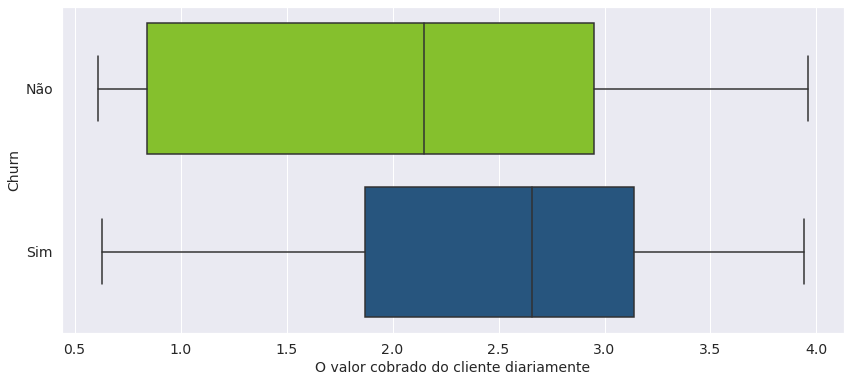

In [207]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=churn_df['Charges_Daily'], y=churn_df['Churn'].map({1: 'Sim', 0: 'Não'}), palette={'Não': '#8AD914', 'Sim': '#18568C'})

plt.xlabel('O valor cobrado do cliente diariamente', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Como o valor cobrado do cliente diariamente foi calculado com base no valor cobrado mensalmente, a distribuição é bem semelhante

### `Charges_Monthly`

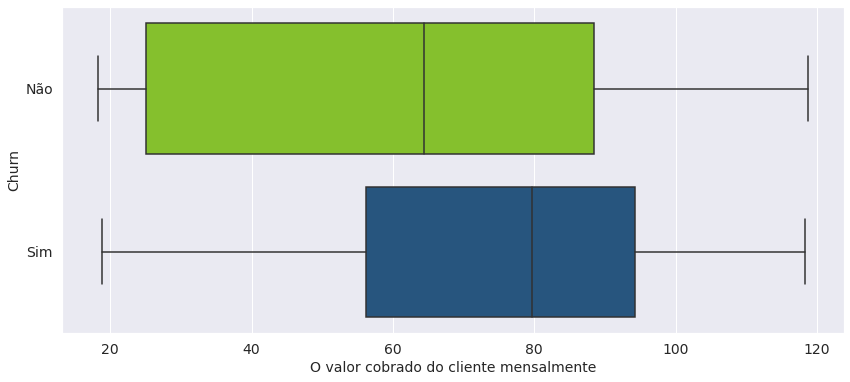

In [208]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=churn_df['Charges_Monthly'], y=churn_df['Churn'].map({1: 'Sim', 0: 'Não'}), palette={'Não': '#8AD914', 'Sim': '#18568C'})

plt.xlabel('O valor cobrado do cliente mensalmente', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### `Charges_Total`

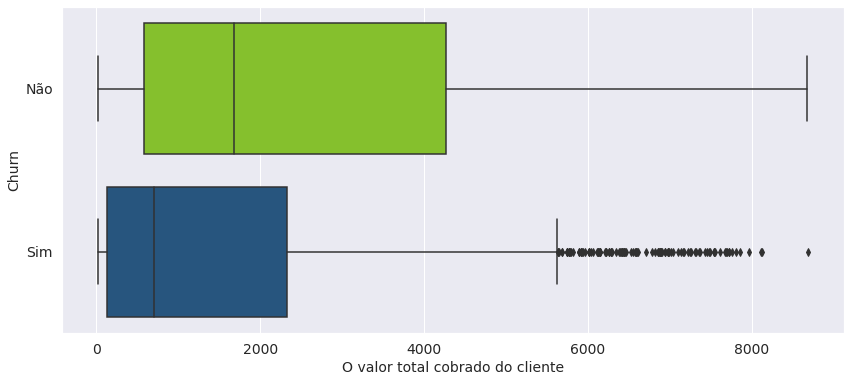

In [209]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=churn_df['Charges_Total'], y=churn_df['Churn'].map({1: 'Sim', 0: 'Não'}), palette={'Não': '#8AD914', 'Sim': '#18568C'})

plt.xlabel('O valor total cobrado do cliente', fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Churn', fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Análise das correlações do dataset

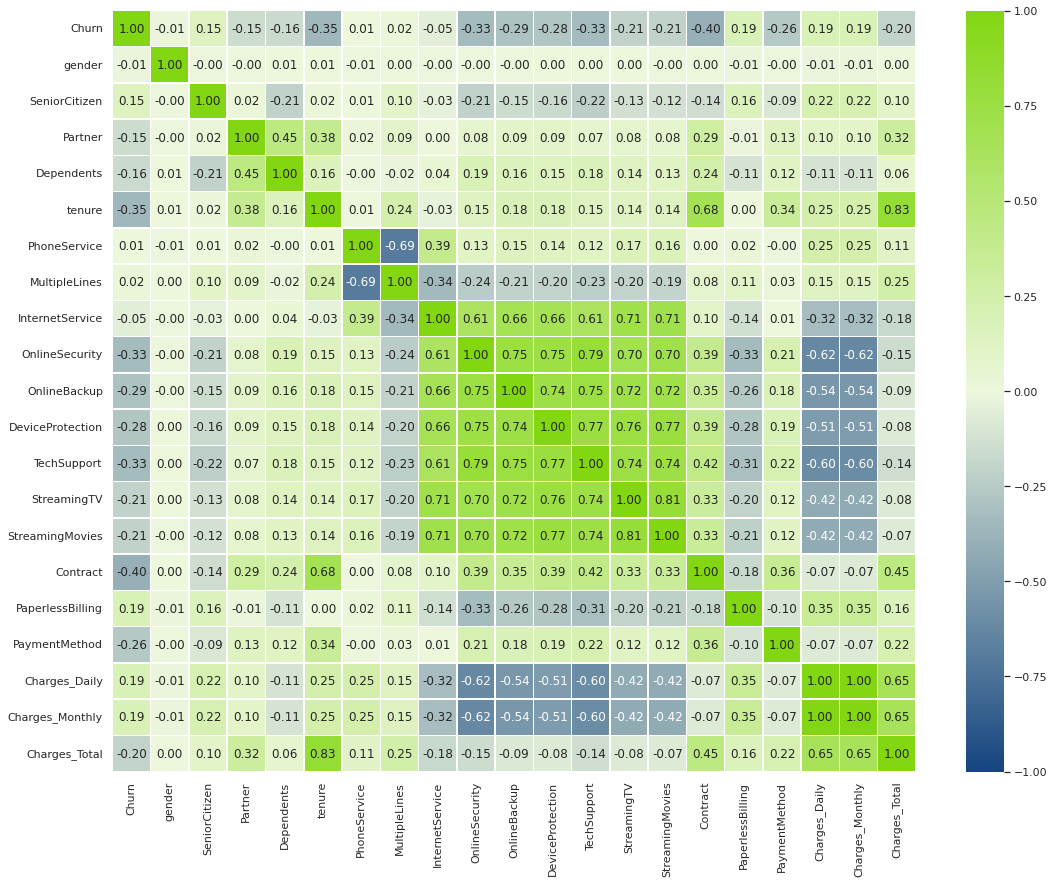

In [210]:
plt.figure(figsize=(18, 14))
sns.heatmap(churn_df.corr(), annot=True, linewidths=.5, fmt='.2f', cmap=cmap_aluravoz, vmin=-1, vmax=1)
plt.show()

A visualização do mapa completo de correlações fica bem "poluído", como a variável target é `Churn`, podemos vsualizar melhor a relação das outras varáveis com `Churn`

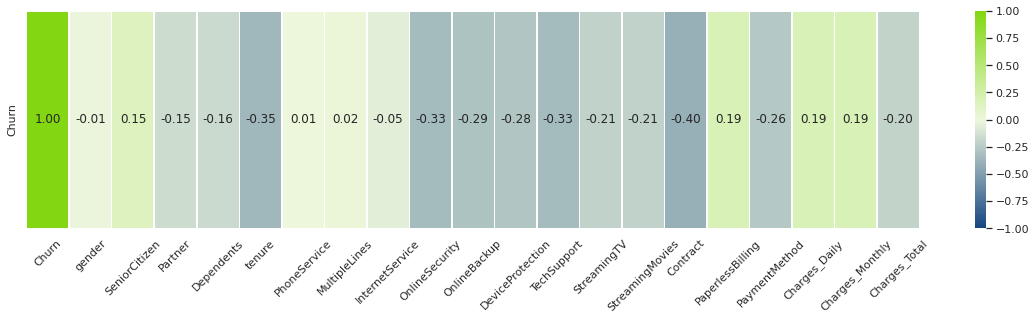

In [212]:
plt.figure(figsize=(20, 4))

sns.heatmap(churn_df.corr().loc[['Churn'], :], annot=True, linewidths=.5, fmt='.2f', cmap=cmap_aluravoz, vmin=-1, vmax=1)

plt.xticks(rotation=45)
plt.show()